## SVM完成iris数据分类

In [1]:
# 导入必要的库
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# 加载Iris数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 特征缩放，使用StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# 初始化SVM分类器
svm_classifier = SVC(kernel='linear', C=1.0)

In [6]:
# 在训练集上训练模型
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [7]:
# 在测试集上进行预测
y_pred = svm_classifier.predict(X_test_scaled)

In [8]:
# 计算准确度
accuracy = accuracy_score(y_test, y_pred)
print(f'使用线性核函数 Accuracy: {accuracy * 100:.2f}%')

使用线性核函数 Accuracy: 96.67%


使用线性核函数，SVM具有良好的分类能力，在测试集上的准确率高达96.67%

下面尝试使用其他核函数进行训练

In [9]:
# SVM分类器（径向基核函数）
svm_classifier_rbf = SVC(kernel='rbf', C=1.0)
svm_classifier_rbf.fit(X_train_scaled, y_train)
y_pred = svm_classifier_rbf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'使用径向基核函数 Accuracy: {accuracy * 100:.2f}%')

使用径向基核函数 Accuracy: 100.00%


In [10]:
# SVM分类器（多项式核函数）
svm_classifier_poly = SVC(kernel='poly', C=1.0)
svm_classifier_poly.fit(X_train_scaled, y_train)
y_pred = svm_classifier_poly.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'使用多项式核函数 Accuracy: {accuracy * 100:.2f}%')

使用多项式核函数 Accuracy: 96.67%


In [11]:
# SVM分类器（sigmoid核函数）
svm_classifier_sigmoid = SVC(kernel='sigmoid', C=1.0)
svm_classifier_sigmoid.fit(X_train_scaled, y_train)
y_pred = svm_classifier_sigmoid.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'使用sigmoid核函数 Accuracy: {accuracy * 100:.2f}%')

使用sigmoid核函数 Accuracy: 90.00%


## SVM完成数据集的非线性分类（data：LR-testSet2.txt）

In [12]:
import numpy as np


file_path = 'D:\\BaiduSyncdisk\\机器学习\\shangji\\data\\LR-testSet2.txt'

# 读取数据到NumPy数组
data_matrix = np.loadtxt(file_path, dtype=float, usecols=(0, 1, 2), delimiter=',')

In [13]:
X_data = data_matrix[:, 0:2]
y_data = data_matrix[:, 2]

In [14]:
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [15]:
svm_classifier = SVC(kernel='linear', C=1.0)

In [16]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
# 在测试集上进行预测
y_pred = svm_classifier.predict(X_test)

In [18]:
# 计算准确度
accuracy = accuracy_score(y_test, y_pred)
print(f'使用线性核函数 Accuracy: {accuracy * 100:.2f}%')

使用线性核函数 Accuracy: 37.50%


可以看到，使用线性核函数的分类效果并不好，接下来尝试使用其他核函数

In [19]:
# SVM分类器（多项式核函数）
svm_classifier_poly = SVC(kernel='poly', C=1.0)
svm_classifier_poly.fit(X_train, y_train)
y_pred = svm_classifier_poly.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'使用多项式核函数 Accuracy: {accuracy * 100:.2f}%')

使用多项式核函数 Accuracy: 70.83%


In [20]:
# SVM分类器（sigmoid核函数）
svm_classifier_sigmoid = SVC(kernel='sigmoid', C=1.0)
svm_classifier_sigmoid.fit(X_train, y_train)
y_pred = svm_classifier_sigmoid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'使用sigmoid核函数 Accuracy: {accuracy * 100:.2f}%')

使用sigmoid核函数 Accuracy: 37.50%


In [21]:
# SVM分类器（径向基核函数）
svm_classifier_rbf = SVC(kernel='rbf', C=1.0)
svm_classifier_rbf.fit(X_train, y_train)
y_pred = svm_classifier_rbf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'使用径向基核函数 Accuracy: {accuracy * 100:.2f}%')

使用径向基核函数 Accuracy: 83.33%


在这些核函数中，径向基核函数在测试集上的表现最好，下面对其进行可视化

### RBF

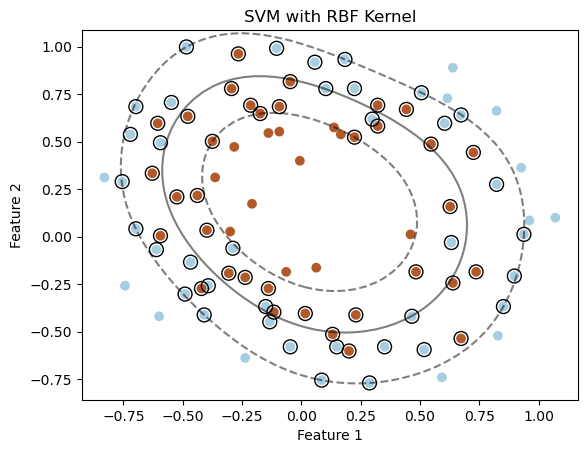

In [22]:
import matplotlib.pyplot as plt


# 可视化分类结果
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)

# 绘制支持向量
plt.scatter(svm_classifier_rbf.support_vectors_[:, 0], svm_classifier_rbf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# 绘制决策边界
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 创建网格来评估模型
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = svm_classifier_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制等高线图
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.title('SVM with RBF Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### linear

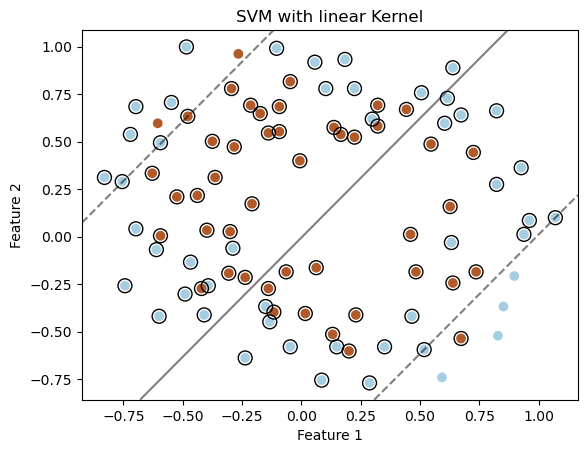

In [23]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)

# 绘制支持向量
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# 绘制决策边界
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 创建网格来评估模型
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制等高线图
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.title('SVM with linear Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### poly

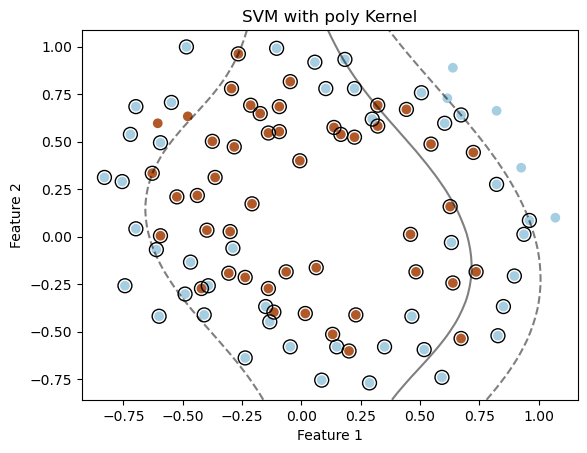

In [24]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)

# 绘制支持向量
plt.scatter(svm_classifier_poly.support_vectors_[:, 0], svm_classifier_poly.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# 绘制决策边界
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 创建网格来评估模型
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = svm_classifier_poly.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制等高线图
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.title('SVM with poly Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### sigmoid

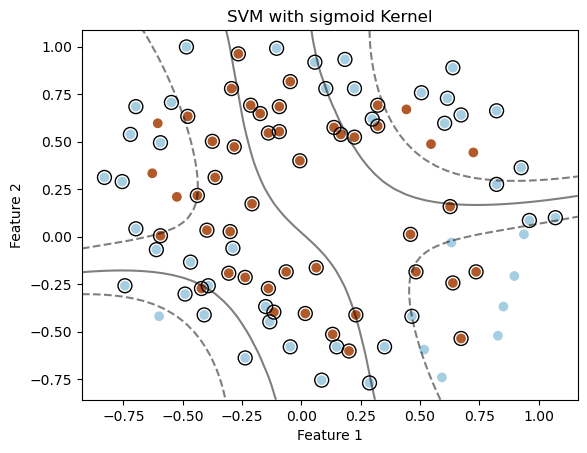

In [25]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)

# 绘制支持向量
plt.scatter(svm_classifier_sigmoid.support_vectors_[:, 0], svm_classifier_sigmoid.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# 绘制决策边界
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 创建网格来评估模型
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = svm_classifier_sigmoid.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制等高线图
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.title('SVM with sigmoid Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()